## Tracking daily changes in historic Agroclimatological Data  
In this notebook we are extracting historic daily agroclimatological data using NASA Power DAV Tool from March 1st, 2023 to June 30th, 2024. Below is a image of the region of data we are observing from Ivory Coast.

<img src="Images/Cocoa_Region.png" alt="Cocoa Regional Map of Ivory Coast" style="width:40%; display: block; margin: 0 auto;">

## Data Cleaning

### Import Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('NASA_Agroclimatological_Data.csv', on_bad_lines='skip')
df.head()

,LAT,LON,YEAR,DOY,GWETPROF,T2M,T2M_MAX,T2M_MIN,TS,RH2M,GWETROOT,PRECTOTCORR
0,4.75,-8.25,2023,60,0.73,26.97,28.95,25.33,27.32,83.49,0.74,0.98
1,4.75,-7.75,2023,60,0.69,26.72,29.31,24.56,26.82,84.77,0.68,0.87
2,4.75,-7.25,2023,60,0.68,26.67,29.38,24.41,26.69,85.31,0.66,0.94
3,4.75,-6.75,2023,60,0.70,26.88,29.09,24.94,26.96,84.96,0.67,1.29
4,4.75,-6.25,2023,60,0.64,27.43,28.94,26.01,27.72,83.81,0.62,1.35


In [4]:
# Change YEAR & DOY into DateTime format
df['DATE'] = pd.to_datetime(df['YEAR'].astype(str) + df['DOY'].astype(str), format='%Y%j')

# Reorder the columns to make DATE the first column and drop YEAR and DOY
df = df[['DATE'] + [col for col in df.columns if col not in ['YEAR', 'DOY', 'DATE']]]

# Rename cols
df.rename(columns={
    'TS': 'Earth_Skin_Temp',
    'RH2M': 'Rel_Humidity',
    'GWETROOT': 'Root_Soil_Wetness',
    'PRECTOTCORR': 'Precip_Corrected',
    'T2M_MIN': 'Temp_Min',
    'T2M_MAX': 'Temp_Max',
    'T2M': 'Temp_Avg',
    'GWETPROF': 'Soil_Moisture'
}, inplace=True)

print(df.shape)
df.head()

(46848, 11)


,DATE,LAT,LON,Soil_Moisture,Temp_Avg,Temp_Max,Temp_Min,Earth_Skin_Temp,Rel_Humidity,Root_Soil_Wetness,Precip_Corrected
0,2023-03-01,4.75,-8.25,0.73,26.97,28.95,25.33,27.32,83.49,0.74,0.98
1,2023-03-01,4.75,-7.75,0.69,26.72,29.31,24.56,26.82,84.77,0.68,0.87
2,2023-03-01,4.75,-7.25,0.68,26.67,29.38,24.41,26.69,85.31,0.66,0.94
3,2023-03-01,4.75,-6.75,0.70,26.88,29.09,24.94,26.96,84.96,0.67,1.29
4,2023-03-01,4.75,-6.25,0.64,27.43,28.94,26.01,27.72,83.81,0.62,1.35


In [7]:
# Drop rows where any cell has a value of -999
df = df[(df != -999).all(axis=1)]

print(df.shape)
df.head()

(43920, 11)


,DATE,LAT,LON,Soil_Moisture,Temp_Avg,Temp_Max,Temp_Min,Earth_Skin_Temp,Rel_Humidity,Root_Soil_Wetness,Precip_Corrected
0,2023-03-01,4.75,-8.25,0.73,26.97,28.95,25.33,27.32,83.49,0.74,0.98
1,2023-03-01,4.75,-7.75,0.69,26.72,29.31,24.56,26.82,84.77,0.68,0.87
2,2023-03-01,4.75,-7.25,0.68,26.67,29.38,24.41,26.69,85.31,0.66,0.94
3,2023-03-01,4.75,-6.75,0.70,26.88,29.09,24.94,26.96,84.96,0.67,1.29
4,2023-03-01,4.75,-6.25,0.64,27.43,28.94,26.01,27.72,83.81,0.62,1.35


## Inital Data Analysis

In [8]:
df.info

<bound method DataFrame.info of             DATE   LAT   LON  Soil_Moisture  Temp_Avg  Temp_Max  Temp_Min  \
0     2023-03-01  4.75 -8.25           0.73     26.97     28.95     25.33   
1     2023-03-01  4.75 -7.75           0.69     26.72     29.31     24.56   
2     2023-03-01  4.75 -7.25           0.68     26.67     29.38     24.41   
3     2023-03-01  4.75 -6.75           0.70     26.88     29.09     24.94   
4     2023-03-01  4.75 -6.25           0.64     27.43     28.94     26.01   
...          ...   ...   ...            ...       ...       ...       ...   
46843 2024-06-30  8.25 -4.75           0.55     25.62     28.88     22.98   
46844 2024-06-30  8.25 -4.25           0.57     25.48     28.22     23.14   
46845 2024-06-30  8.25 -3.75           0.58     25.47     28.37     23.33   
46846 2024-06-30  8.25 -3.25           0.56     25.19     28.30     23.21   
46847 2024-06-30  8.25 -2.75           0.55     25.42     28.62     23.55   

       Earth_Skin_Temp  Rel_Humidity  Root_

<Figure size 1600x1000 with 0 Axes>

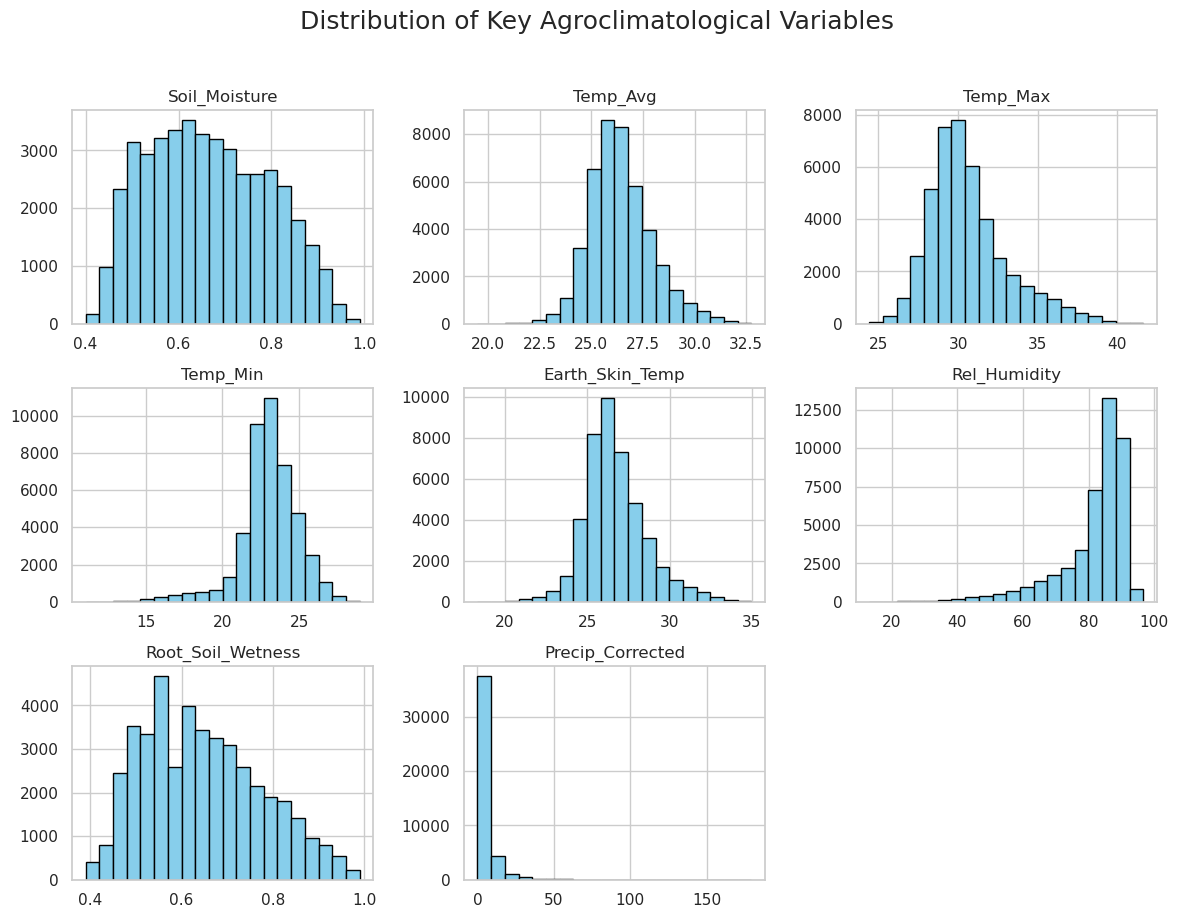

In [9]:
# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))

# Histograms of the key weather variables
df[['Soil_Moisture', 'Temp_Avg', 'Temp_Max', 'Temp_Min', 'Earth_Skin_Temp', 'Rel_Humidity', 'Root_Soil_Wetness', 'Precip_Corrected']].hist(bins=20, figsize=(14,10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Key Agroclimatological Variables", fontsize=18)
plt.show()

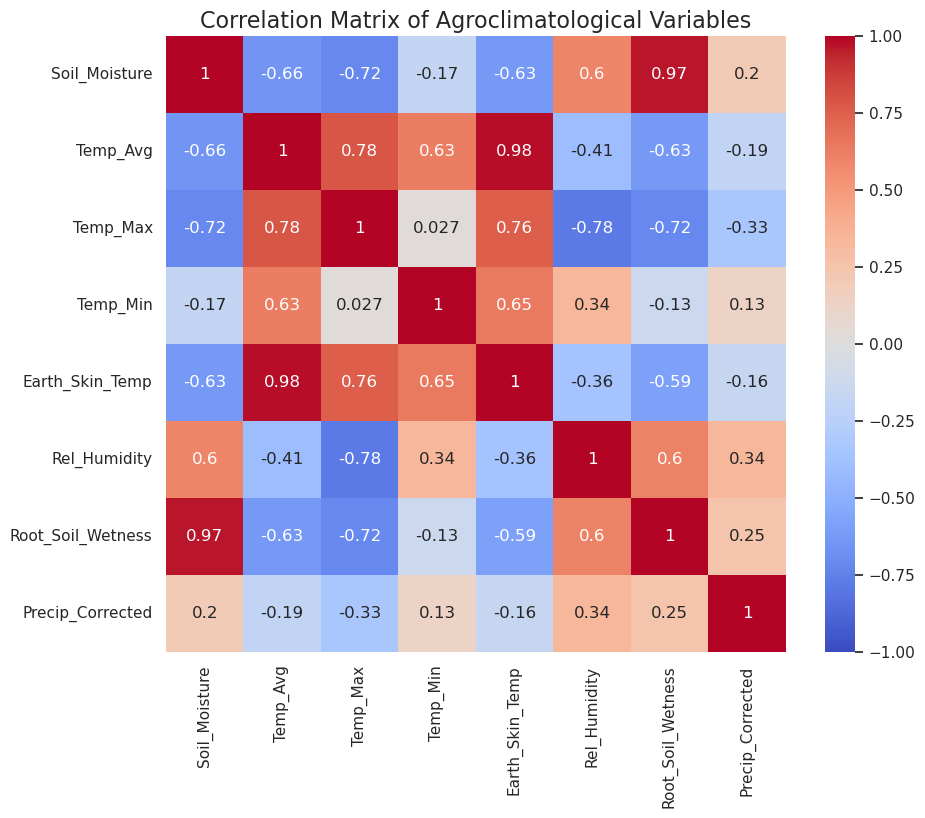

In [10]:
# Calculate correlation matrix
correlation_matrix = df[['Soil_Moisture', 'Temp_Avg', 'Temp_Max', 'Temp_Min', 'Earth_Skin_Temp', 'Rel_Humidity', 'Root_Soil_Wetness', 'Precip_Corrected']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Agroclimatological Variables", fontsize=16)
plt.show()

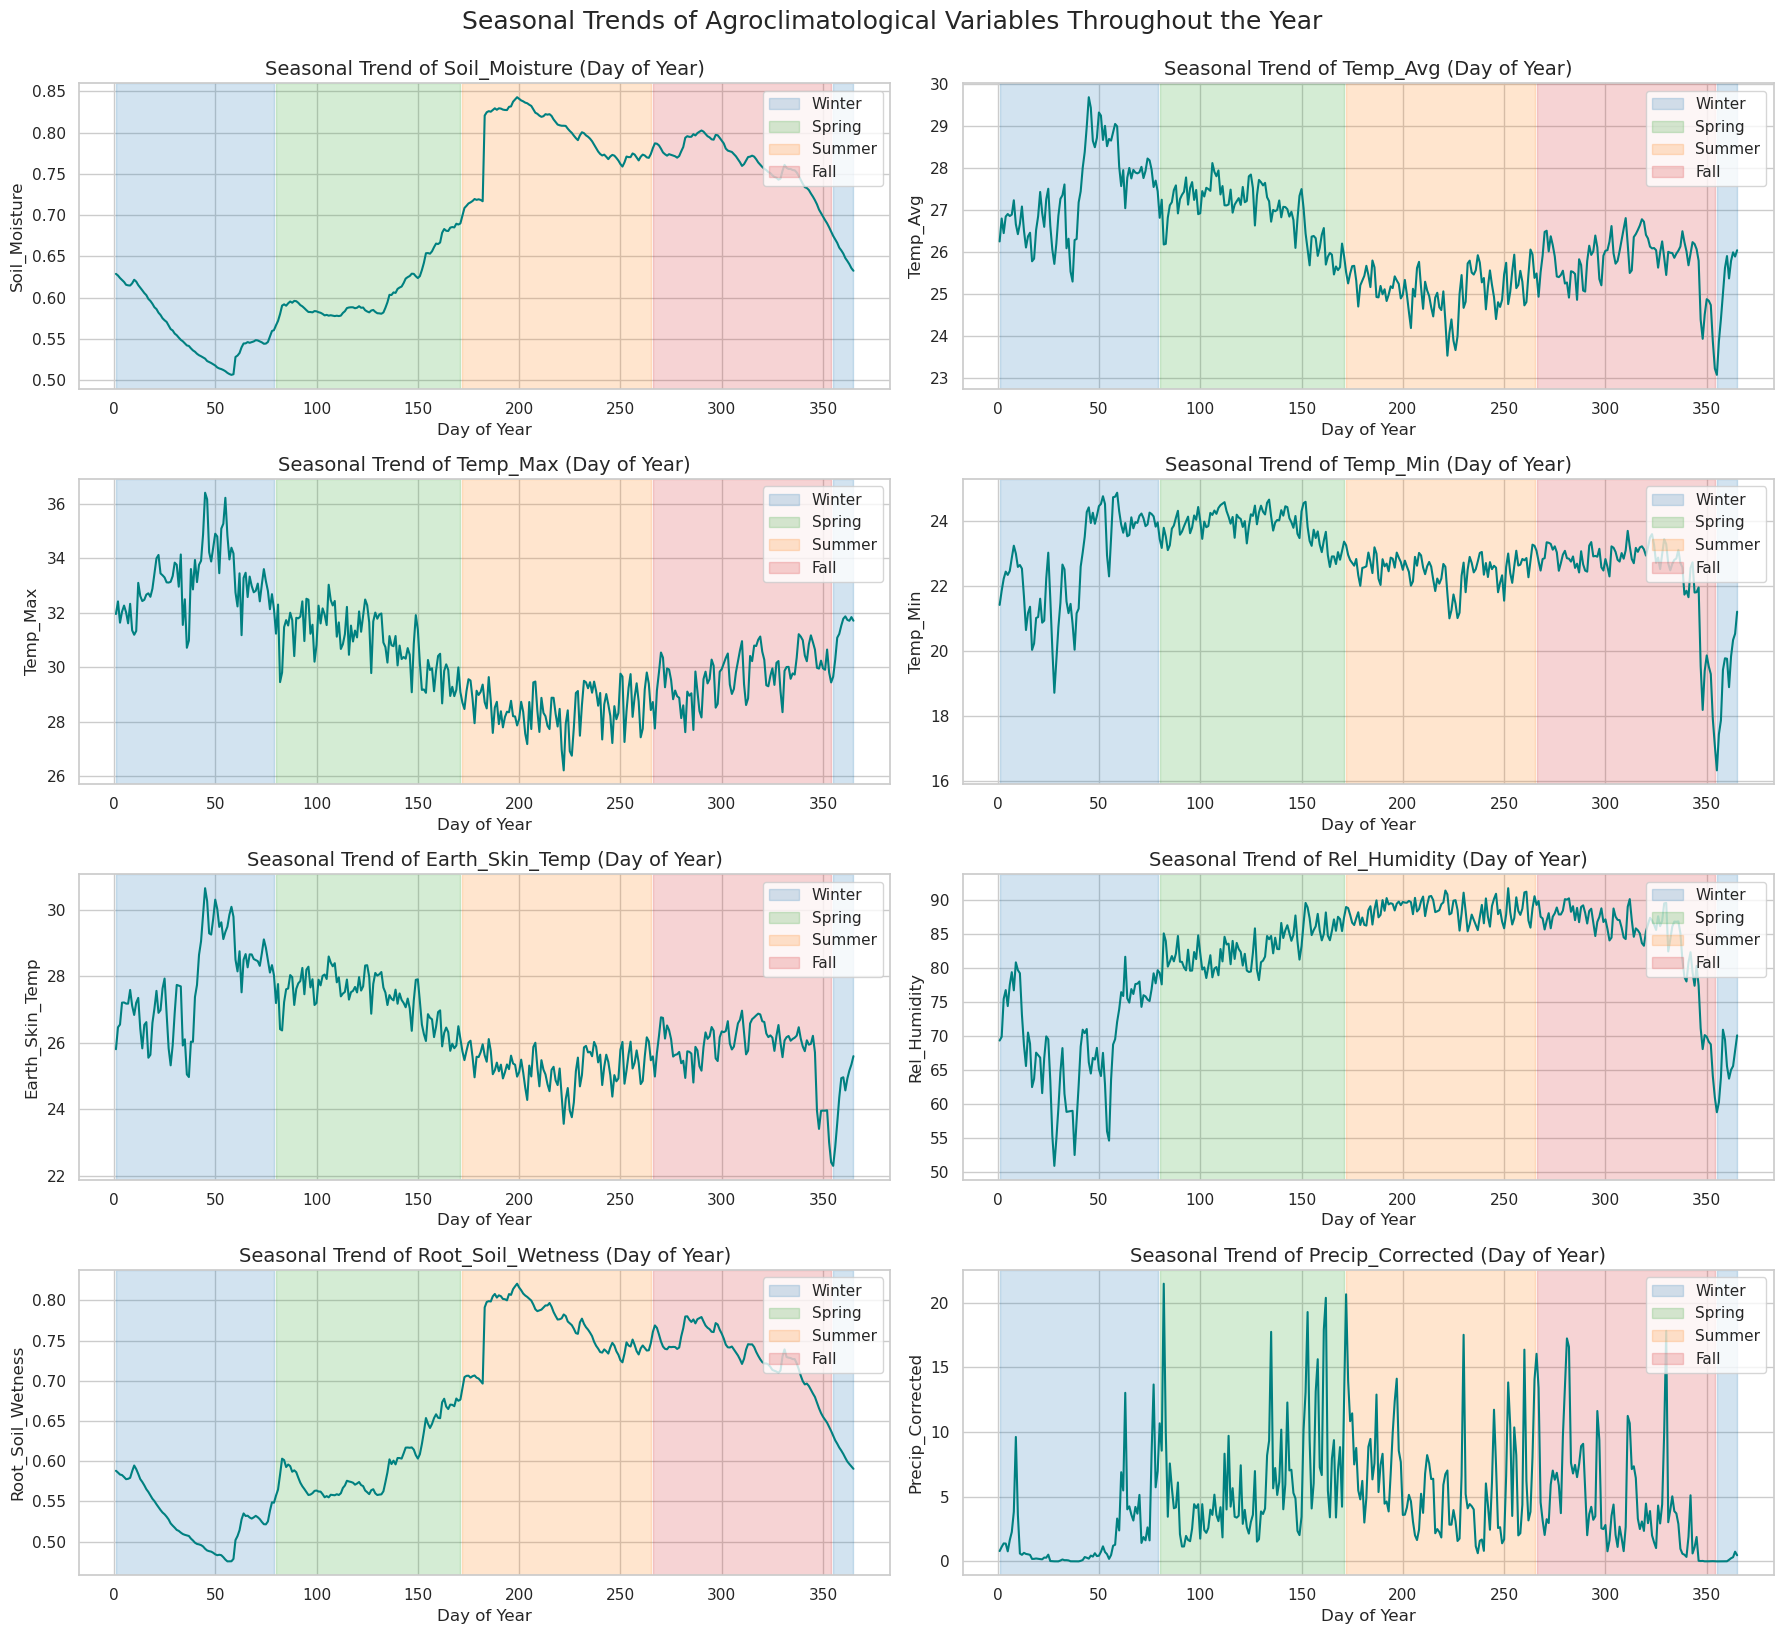

In [13]:
# Define the DOY ranges for each season
seasons = {
    'Winter': (355, 365),
    'Winter_Cont': (1, 79),  # Continues into the new year
    'Spring': (80, 171),
    'Summer': (172, 265),
    'Fall': (266, 354)
}

# Plot seasonal trends with seasonal highlights
plt.figure(figsize=(18, 16))

# Variables to examine by day of year
variables = ['Soil_Moisture', 'Temp_Avg', 'Temp_Max', 'Temp_Min', 'Earth_Skin_Temp', 'Rel_Humidity', 'Root_Soil_Wetness', 'Precip_Corrected']

# Higher contrast colors for each season
season_colors = {
    'Winter': '#1f77b4',   # Dark blue
    'Spring': '#2ca02c',   # Dark green
    'Summer': '#ff7f0e',   # Orange
    'Fall': '#d62728'      # Dark red
}

# Plot each variable
for i, var in enumerate(variables, 1):
    plt.subplot(4, 2, i)
    sns.lineplot(x=df['DATE'].dt.dayofyear, y=df[var], estimator='mean', errorbar=None, color="teal")
    plt.title(f"Seasonal Trend of {var} (Day of Year)", fontsize=14)
    plt.xlabel("Day of Year")
    plt.ylabel(var)
    
    # Highlight each season with higher contrast colors
    plt.axvspan(seasons['Winter'][0], seasons['Winter'][1], color=season_colors['Winter'], alpha=0.2, label="Winter")
    plt.axvspan(seasons['Winter_Cont'][0], seasons['Winter_Cont'][1], color=season_colors['Winter'], alpha=0.2)
    plt.axvspan(seasons['Spring'][0], seasons['Spring'][1], color=season_colors['Spring'], alpha=0.2, label="Spring")
    plt.axvspan(seasons['Summer'][0], seasons['Summer'][1], color=season_colors['Summer'], alpha=0.2, label="Summer")
    plt.axvspan(seasons['Fall'][0], seasons['Fall'][1], color=season_colors['Fall'], alpha=0.2, label="Fall")
    
    # Add legend to each subplot
    plt.legend(loc='upper right')

plt.tight_layout()
plt.suptitle("Seasonal Trends of Agroclimatological Variables Throughout the Year", fontsize=18, y=1.02)
plt.show()